# Data Clean

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
drop_list = {'da':'Unnamed: 0','ds':['Unnamed: 0','index']}

In [3]:
def clean_Salary(df, job_name):
    df[['low_salary','high_salary']] = df['Salary Estimate'].str.split('-', expand = True)
    df['low_salary']=df['low_salary'].str.extract('(\d+k|\d+\.\d+|\d+ \d+|\d+)')
    df['low_salary'] = df['low_salary'].fillna('-1')
    df['low_salary'] = df['low_salary'].astype('int')
    df['low_salary'] = df['low_salary']*1000
    df['high_salary']= df['high_salary'].str.extract('(\d+k|\d+\.\d+|\d+ \d+|\d+)')
    df['high_salary'] = df['high_salary'].astype('int')
    df['high_salary'] = df['high_salary']*1000

    return df


In [4]:
def clean_Company_Name(df, job_name):
    df[['Company Name','score']] = df['Company Name'].str.split('\n', expand = True)
    
    return df

In [5]:
def clean_location(df, job_name):
    df[['Location','shorthand']] = df['Location'].str.split(',', n=1 ,expand = True)
    
    return df

In [6]:
def clean_Size(df, job_name):
    df[['minimum_ppl','maximum_ppl']] = df['Size'].str.split('to', expand = True)
    df['maximum_ppl'] = df['maximum_ppl'].fillna('unknown')
    df.loc[df['maximum_ppl'] == 'unknown', 'maximum_ppl'] = df['minimum_ppl']
    df['minimum_ppl'] = df['minimum_ppl'].str.extract('(\d+|\d+\+|-\d)')
    df['maximum_ppl'] = df['maximum_ppl'].str.extract('(\d+|\d+\+|-\d)')

    return df

In [7]:
def clean_Revenue(df, job_name):
    df[['minimum_rev','maximum_rev']] = df['Revenue'].str.split('to', expand = True)
    df['maximum_rev'] = df['maximum_rev'].fillna('unknown')
    df.loc[df['maximum_rev'] == 'unknown', 'maximum_rev'] = df['minimum_rev']
    df['minimum_rev'] = df['minimum_rev'].str.replace('Unknown / Non-Applicable', '-1', regex = True )
    df['minimum_rev'] = df['minimum_rev'].str.extract('(\d+|\d+\+|-\d)')
    df['minimum_rev'] = df['minimum_rev'].astype('int')
    df['minimum_rev'] = df['minimum_rev']*1000000
    df['maximum_rev'] = df['maximum_rev'].str.replace('Unknown / Non-Applicable', '-1', regex = True )
    df['maximum_rev'] = df['maximum_rev'].str.extract('(\d+|\d+\+|-\d)')
    df['maximum_rev'] = df['maximum_rev'].astype('int')
    df['maximum_rev'] = df['maximum_rev']*1000000
    
    return df

In [8]:
def add_information(df, job_name):    
    df['minimum_ppl'] = df['minimum_ppl'].fillna(-1)
    df['maximum_ppl'] = df['maximum_ppl'].fillna(-1)
    df['company_age'] = df['Founded'].astype('int')
    df['minimum_ppl'] = df['minimum_ppl'].astype('int')
    df['maximum_ppl'] = df['maximum_ppl'].astype('int')
    df['company_age'] = 2020 - df['company_age']
    df['job_category'] = job_name
    
    return df

In [9]:
def drop_columns(df, job_name):
    if job_name in drop_list:
        df = df.drop(drop_list[job_name], axis=1, inplace=False)
    df.drop(['Salary Estimate','Size','Revenue','score'], axis=1, inplace=True)
    df = df.drop(df[df.Rating < 0].index)
    df = df.drop(df[df.Founded < 0].index)
    df = df.drop(df[df.low_salary < 0].index)
    df = df.drop(df[df.high_salary < 0].index)
    df = df.drop(df[df.minimum_ppl < 0].index)
    df = df.drop(df[df.maximum_ppl < 0].index)
    df = df.drop(df[df.maximum_ppl < 0].index)
    df = df.drop(df[df.minimum_rev < 0].index)
    df = df.drop(df[df.maximum_rev < 0].index)
    df = df.drop(df[df.Industry == '-1'].index)
  
    return df

In [10]:
def clean_datas(file_path, job_name):
    df = pd.read_csv(file_path, header=0)
    df = clean_Salary(df, job_name)
    df = clean_Company_Name(df, job_name)
    df = clean_location(df, job_name)
    df = clean_Size(df, job_name)
    df = clean_Revenue(df, job_name)
    df = add_information(df, job_name)
    df = drop_columns(df, job_name)
  
    return df

In [11]:
df_da = clean_datas('/Users/logan/Downloads/DataAnalyst.csv','da')

In [12]:
df_de = clean_datas('/Users/logan/Downloads/DataEngineer.csv','de')

In [13]:
df_ds = clean_datas('/Users/logan/Downloads/DataScientist.csv','ds')

# Date Analysis

In [14]:
merge_data = pd.concat([df_da,df_de,df_ds], ignore_index = True, sort = False)

In [15]:
Industry_da = df_da.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_da = Industry_da.sort_values(by='count', ascending=False)
Industry_da = Industry_da.nlargest(5, 'count')
Industry_da['job_category']='da'


In [16]:
Sector_da = df_da.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_da = Sector_da.sort_values(by='count', ascending=False)
Sector_da = Sector_da.nlargest(5, 'count')
Sector_da['job_category']='da'


In [17]:
Industry_de = df_de.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_de = Industry_de.sort_values(by='count', ascending=False)
Industry_de = Industry_de.nlargest(5, 'count')
Industry_de['job_category']='de'


In [18]:
Sector_de = df_de.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_de = Sector_de.sort_values(by='count', ascending=False)
Sector_de = Sector_de.nlargest(5, 'count')
Sector_de['job_category']='de'


In [19]:
Industry_ds = df_ds.groupby(['Industry'])["Job Title"].count().reset_index(name="count")
Industry_ds = Industry_ds.sort_values(by='count', ascending=False)
Industry_ds = Industry_ds.nlargest(5, 'count')
Industry_ds['job_category']='ds'


In [20]:
Sector_ds = df_ds.groupby(['Sector'])["Job Title"].count().reset_index(name="count")
Sector_ds = Sector_ds.sort_values(by='count', ascending=False)
Sector_ds = Sector_ds.nlargest(5, 'count')
Sector_ds['job_category']='ds'

In [21]:
Industry_data = pd.concat([Industry_da,Industry_de,Industry_ds], ignore_index = True, sort = False)

In [22]:
Sector_data = pd.concat([Sector_da,Sector_de,Sector_ds], ignore_index = True, sort = False)

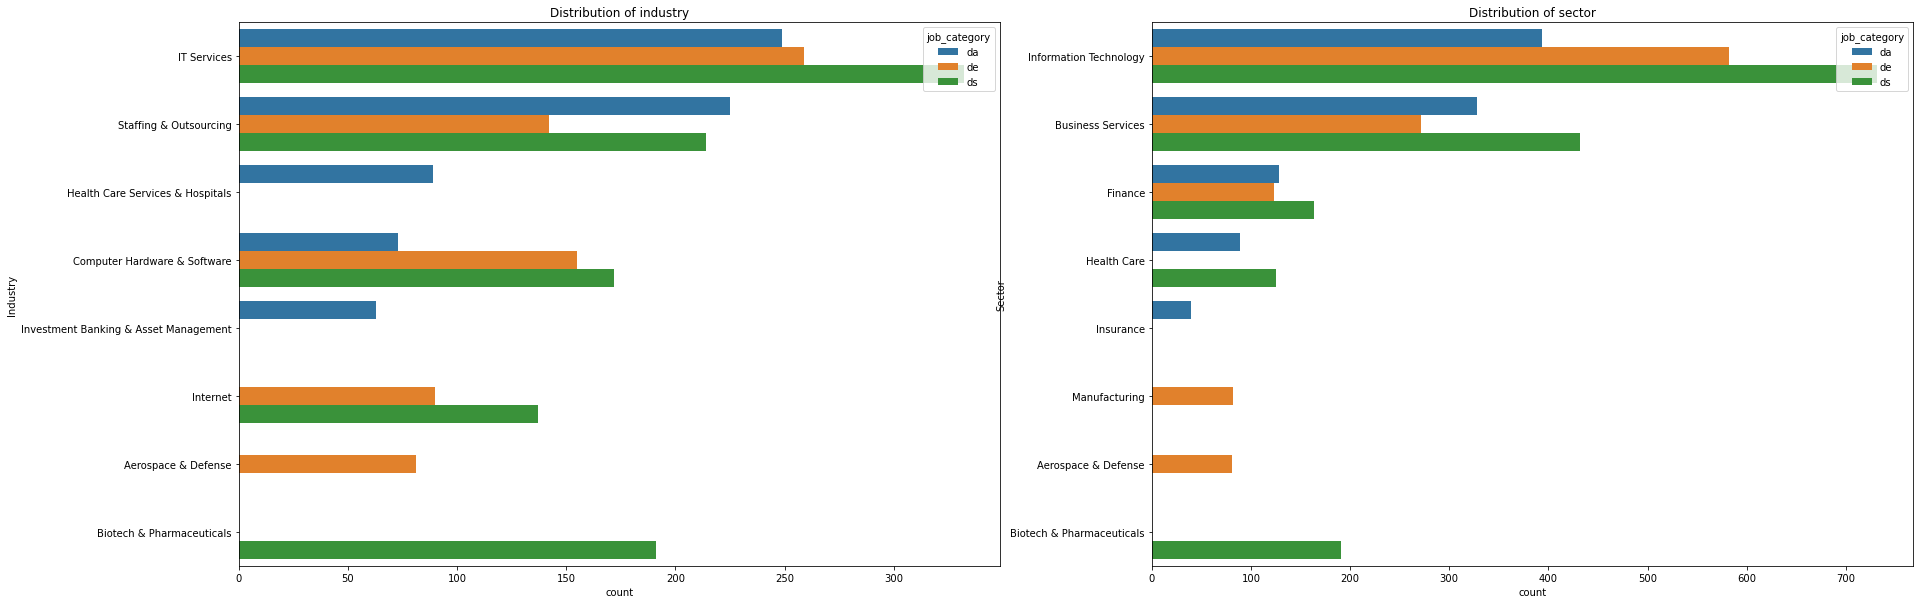

In [23]:

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
axs[0].set_title('Distribution of industry')
sns.barplot(x="count", y="Industry", hue="job_category", data=Industry_data,capsize=.05, ax=axs[0])
axs[1].set_title('Distribution of sector')
sns.barplot(x="count", y="Sector", hue="job_category", data=Sector_data,capsize=.05,ax=axs[1])
plt.show()


In [24]:
df_salary_location = merge_data.loc[(merge_data['Industry']=='IT Services') & (merge_data['Sector']=='Information Technology')].groupby(['Location','shorthand'], as_index = False).mean()
df_low_salary_location = df_salary_location.sort_values(by='low_salary', ascending=True)
df_low_salary_location = df_low_salary_location[['Location','shorthand','low_salary','high_salary']].reset_index()
df_low_salary_location['shorthand'] = df_low_salary_location['shorthand'].str.strip()

In [25]:
import plotly.graph_objects as go

import pandas as pd

df = df_low_salary_location


fig = go.Figure(data=go.Choropleth(
    locations=df['shorthand'], # Spatial coordinates
    z = df['low_salary'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "low_salary $",
))

fig.update_layout(
    title_text = 'US of low_salary by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [26]:
df_high_salary_location = df_salary_location.sort_values(by='high_salary',ascending=True)
df_high_salary_location = df_high_salary_location[['shorthand','low_salary','high_salary']].reset_index()
df_high_salary_location['shorthand'] = df_high_salary_location['shorthand'].str.strip()

In [27]:
import plotly.graph_objects as go

import pandas as pd

df = df_high_salary_location


fig = go.Figure(data=go.Choropleth(
    locations=df['shorthand'], # Spatial coordinates
    z = df['high_salary'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greens',
    colorbar_title = "high_salary $",
))

fig.update_layout(
    title_text = 'US of high_salary by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [28]:
df_ca_Industry = merge_data.loc[merge_data['shorthand'].str.contains('CA')]
df_ca_Industry_count = df_ca_Industry.groupby(['Industry','Sector'])["Industry"].count().reset_index(name="count")
df_ca_Industry_count = df_ca_Industry_count.sort_values(by='count', ascending=False).head(6)


In [29]:
location_data = df_ca_Industry.groupby(['Location']).low_salary.agg(['count','mean']).reset_index()

location_data_top6 = location_data.sort_values(by='count', ascending=False).head(6)

[None, Text(0.5, 1.0, 'Hot city in CA state')]

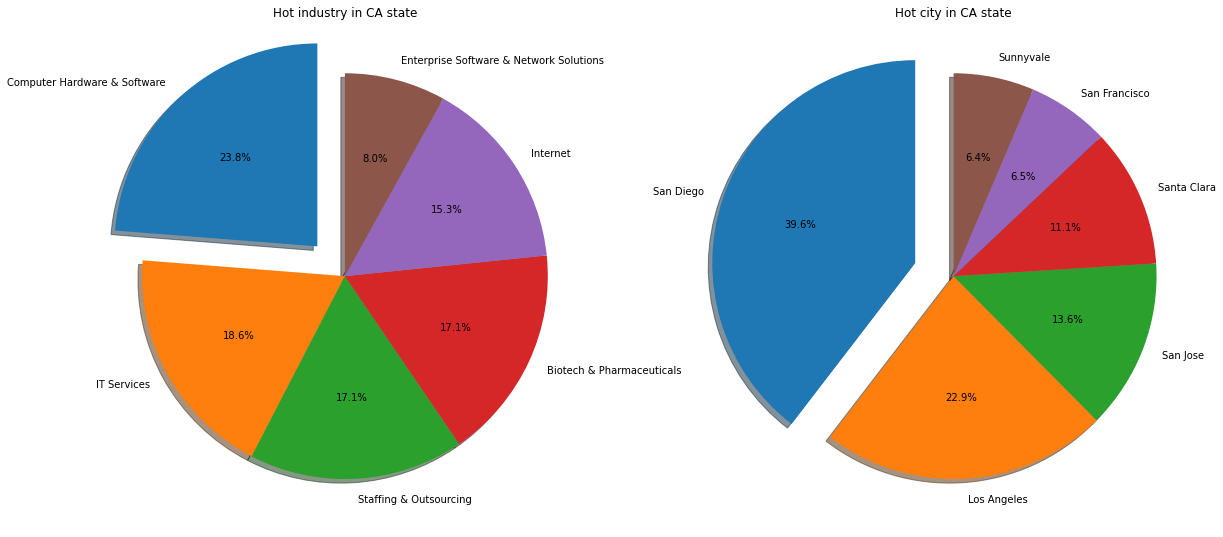

In [30]:


# Make figure and axes
fig, axs = plt.subplots(1, 2, figsize = (20, 10))

# A standard pie plot
axs[0].pie(df_ca_Industry_count['count'], explode =(0.2,0,0,0,0,0), labels=df_ca_Industry_count['Industry'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].set(aspect="equal", title='Hot industry in CA state')


# Shift the second slice using explode
axs[1].pie(location_data_top6['count'], explode =(0.2,0,0,0,0,0), labels=location_data_top6['Location'], autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].set(aspect="equal", title='Hot city in CA state')


In [31]:
df_category_salary = merge_data.groupby(['job_category'], as_index = False).mean(['low_salary'])

df_category_salary

job_category    Rating      Founded    low_salary    high_salary  \
0           da  3.739303  1974.447761  53703.980100   88989.220564   
1           de  3.805325  1976.634163  76860.304288  123930.152144   
2           ds  3.775237  1965.370739  81839.488636  134065.814394   

   minimum_ppl  maximum_ppl   minimum_rev   maximum_rev  company_age  
0  3278.802653  4572.180763  6.117745e+07  1.108391e+08    45.552239  
1  4149.304288  5390.318119  5.050692e+07  1.118001e+08    43.365837  
2  4717.497633  5904.900568  5.034896e+07  9.243561e+07    54.629261

<AxesSubplot:title={'center':'average maximum_rev'}, xlabel='job_category', ylabel='maximum_rev'>

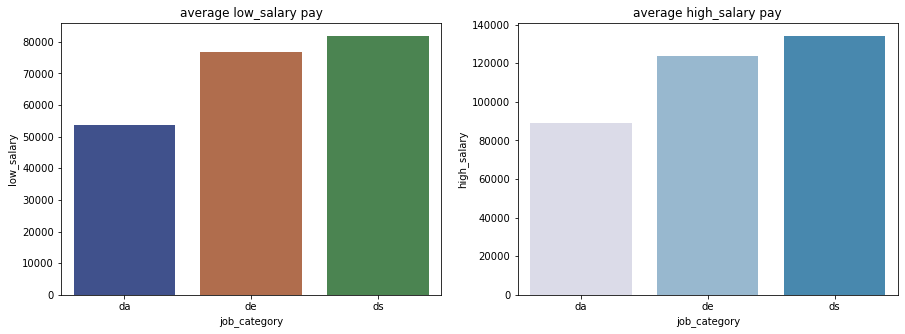

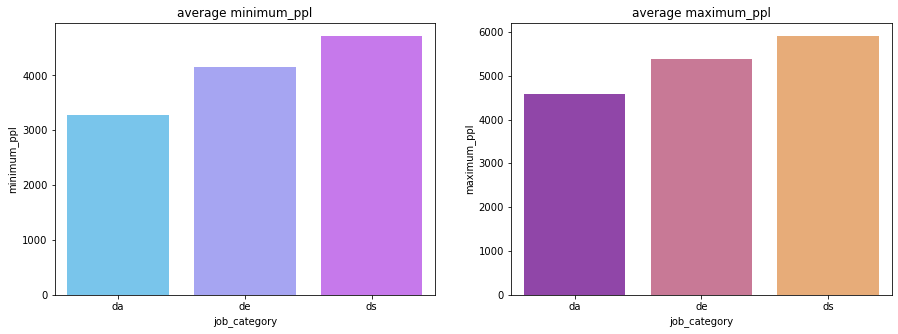

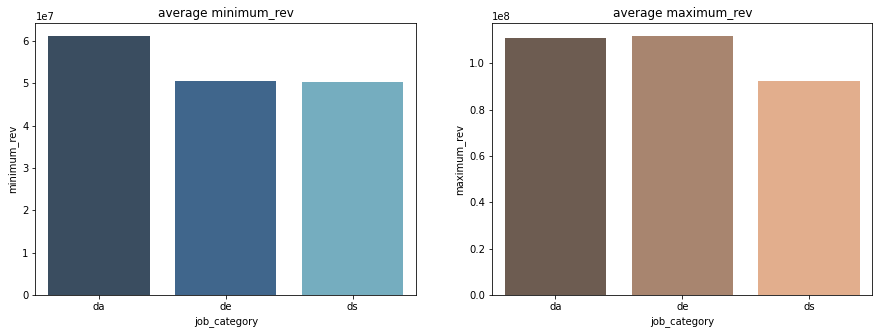

In [32]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average low_salary pay')
sns.barplot(data=df_category_salary, x='job_category', y="low_salary",  ci="sd", palette="dark", alpha=.8, ax=axs[0])
axs[1].set_title('average high_salary pay')
sns.barplot(data=df_category_salary, x="job_category", y="high_salary", ci="sd", palette="PuBu", alpha=.8, ax=axs[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average minimum_ppl')
sns.barplot(data=df_category_salary, x='job_category', y="minimum_ppl",  ci="sd", palette="cool", alpha=.8, ax=axs[0])
axs[1].set_title('average maximum_ppl')
sns.barplot(data=df_category_salary, x='job_category', y="maximum_ppl",  ci="sd", palette="plasma", alpha=.8, ax=axs[1])
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].set_title('average minimum_rev')
sns.barplot(data=df_category_salary, x='job_category', y="minimum_rev",  ci="sd", palette="ocean", alpha=.8, ax=axs[0])
axs[1].set_title('average maximum_rev')
sns.barplot(data=df_category_salary, x='job_category', y="maximum_rev",  ci="sd", palette="copper", alpha=.8, ax=axs[1])




<AxesSubplot:xlabel='maximum_ppl', ylabel='high_salary'>

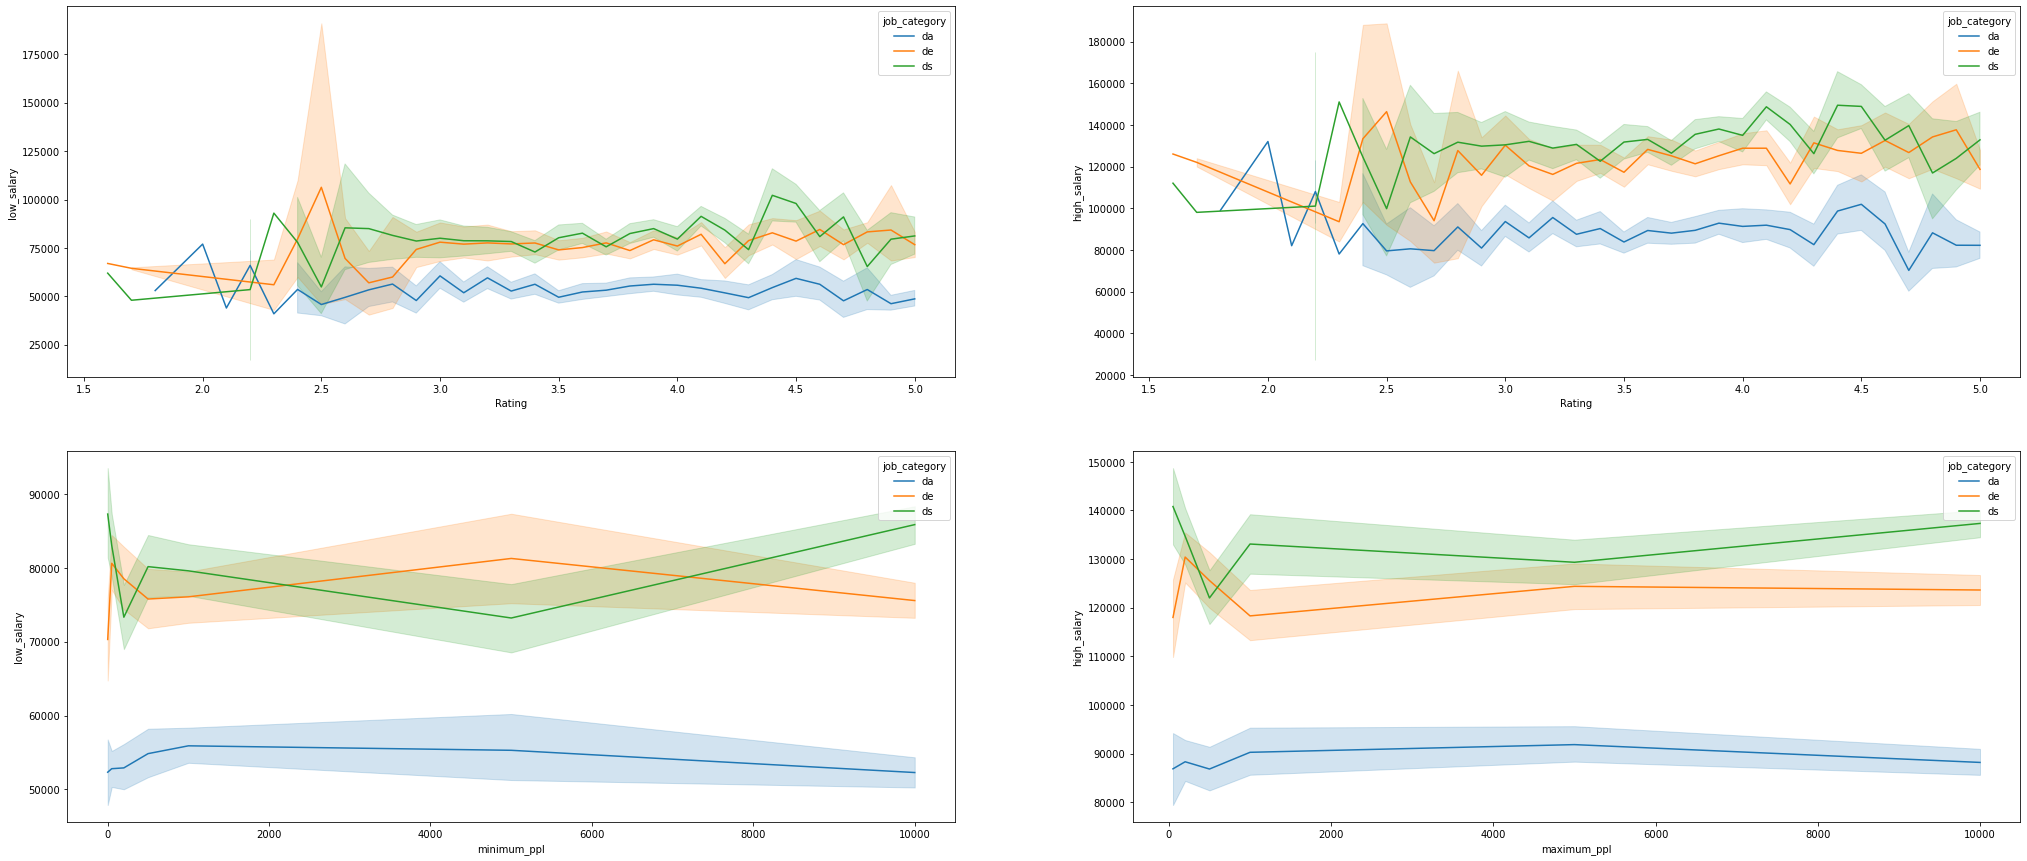

In [33]:
plt.figure(figsize=(35,15))
plt.subplot(2,2,1)
sns.lineplot(x = 'Rating', y = 'low_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,2)
sns.lineplot(x = 'Rating', y = 'high_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,3)
sns.lineplot(x = 'minimum_ppl', y = 'low_salary', data = merge_data, hue= 'job_category')

plt.subplot(2,2,4)
sns.lineplot(x = 'maximum_ppl', y = 'high_salary', data = merge_data, hue= 'job_category')


<AxesSubplot:title={'center':'ds'}, ylabel='Count'>

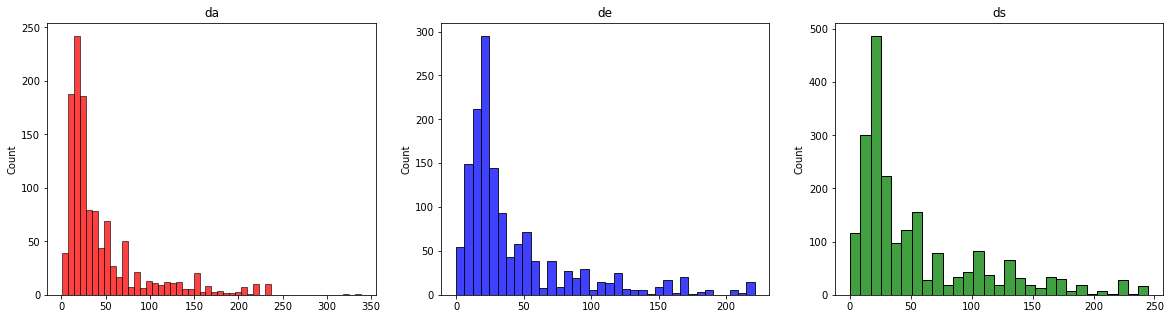

In [34]:
x = df_da['company_age'].values
y = df_de['company_age'].values
z = df_ds['company_age'].values

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
axs[0].set_title('da')
sns.histplot(x, color = 'red',ax=axs[0])
axs[1].set_title('de')
sns.histplot(y, color = 'blue',ax=axs[1])
axs[2].set_title('ds')
sns.histplot(z, color = 'green',ax=axs[2])


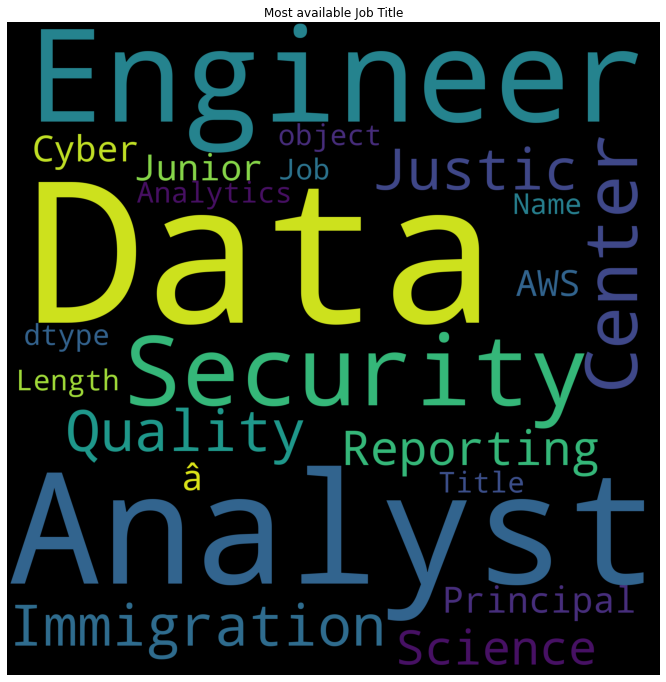

In [35]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      height =2000,
                      width = 2000
                     ).generate(str(merge_data["Job Title"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Most available Job Title")
plt.show()

# Machine Learning

In [36]:
x_df = merge_data[['Job Title', 'Rating', 'Location','Company Name','Type of ownership','Industry','Sector','company_age']]
#x_df = result_df[['location','Domain']]
y_df = merge_data['high_salary']

In [37]:
x_df

Job Title  Rating  Location  \
0     Data Analyst, Center on Immigration and Justic...     3.2  New York   
1                                  Quality Data Analyst     3.8  New York   
2                                          Data Analyst     4.1  New York   
3                                Reporting Data Analyst     3.9  New York   
4                                  Data Science Analyst     3.7  New York   
...                                                 ...     ...       ...   
4759                            Principal Data Engineer     4.6  Columbus   
4760                       Cyber Security Data Engineer     3.9    Dublin   
4761                                  AWS Data Engineer     4.4    Dublin   
4762                              Data Analyst â Junior     5.0  Columbus   
4763                   Security Analytics Data Engineer     3.8    Dublin   

                            Company Name               Type of ownership  \
0              Vera Institute of Justice          Nonprofit Organization   
1     Visiting Nurse Service of New York          Nonprofit Organization   
2                               Celerity  Subsidiary or Business Segment   
3                                FanDuel               Company - Private   
4                GNY Insurance Companies               Company - Private   
...                                  ...                             ...   
4759                         ComResource               Company - Private   
4760                              ApTask               Company - Private   
4761                Tachyon Technologies               Company - Private   
4762    Staffigo Technical Services, LLC               Company - Private   
4763                      PDS Tech, Inc.               Company - Private   

                              Industry                            Sector  \
0                    Social Assistance                        Non-Profit   
1     Health Care Services & Hospitals                       Health Care   
2                          IT Services            Information Technology   
3                  Sports & Recreation  Arts, Entertainment & Recreation   
4                   Insurance Carriers                         Insurance   
...                                ...                               ...   
4759                       IT Services            Information Technology   
4760                       IT Services            Information Technology   
4761                       IT Services            Information Technology   
4762                       IT Services            Information Technology   
4763            Staffing & Outsourcing                 Business Services   

      company_age  
0              59  
1             127  
2              18  
3              11  
4             106  
...           ...  
4759           29  
4760           10  
4761            9  
4762           12  
4763           43  

[4764 rows x 8 columns]

In [38]:
#Encoding qualitative data
from sklearn.preprocessing import LabelEncoder

x_df = x_df.apply(LabelEncoder().fit_transform)
#x_df[['Job title','company name','location','Domain']] = x_df[['Job title','company name','location','Domain']].apply(LabelEncoder().fit_transform)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, random_state=0)

In [40]:
X_test

Job Title  Rating  Location  Company Name  Type of ownership  Industry  \
3228        129      10       102           363                 11        41   
2052       1319      17       191           492                 11         1   
1688       1822      22       169           768                 11         0   
2189       2032      26        53           827                  1        18   
562         764      22        73           914                  1        82   
...         ...     ...       ...           ...                ...       ...   
2433       2181      31        11           497                  1        20   
3225       2306      16       102           597                  1         4   
45           84      13       150          1091                  2        42   
3440        204      33       169          1005                  1        48   
1104       2259      18        13           550                  6        42   

      Sector  company_age  
3228      13           30  
2052       4           51  
1688       0           33  
2189      11            7  
562        4           20  
...      ...          ...  
2433       4           12  
3225       4           60  
45        10           53  
3440      11            2  
1104      10          141  

[477 rows x 8 columns]

In [41]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [43]:
print(lin_reg.intercept_)

97176.16158973836


In [44]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

Coefficient
Job Title             2.107526
Rating              599.355495
Location            101.589586
Company Name         -3.052151
Type of ownership   162.747819
Industry           -151.150022
Sector              475.105905
company_age         -10.260559

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [46]:
pred = lin_reg.predict(X_test)

In [47]:
X_test['pred'] = pd.Series(pred)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [48]:
X_test.shape

(477, 8)

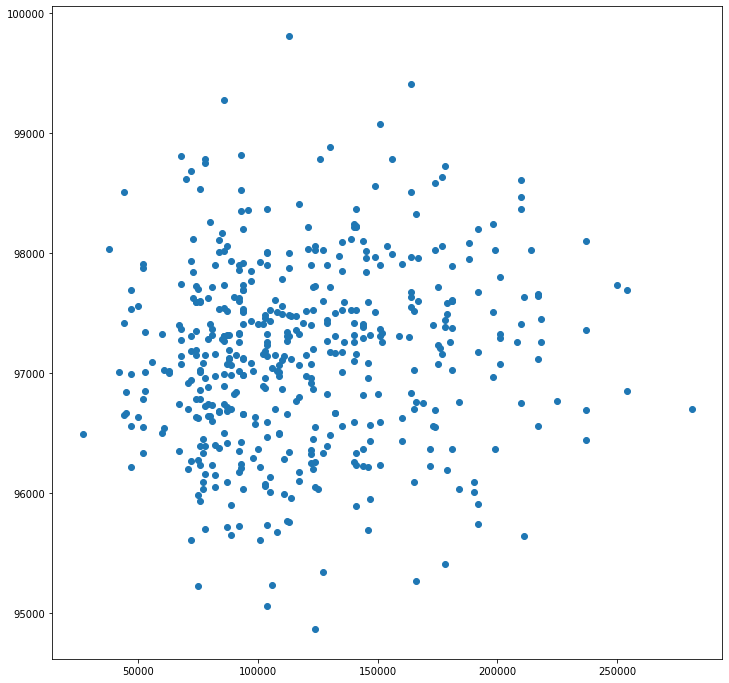

In [49]:
plt.scatter(y_test, pred)

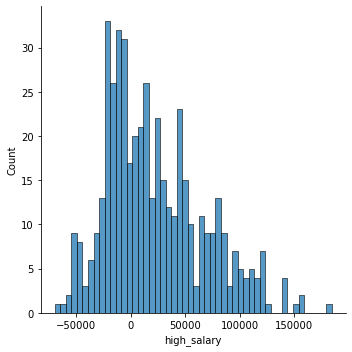

In [50]:
sns.displot((y_test - pred), bins=50);

In [51]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 37289.12270682639
MSE: 2499872285.5250535
RMSE: 49998.72283893913
R2 Square -0.23151654067299554
Train set evaluation:
_____________________________________
MAE: 37072.0478663078
MSE: 2403631847.969133
RMSE: 49026.84823613622
R2 Square -0.26156688345939116


In [52]:
evaluate_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df

Model           MAE           MSE          RMSE  R2 Square  \
0  Linear Regression  37289.122707  2.499872e+09  49998.722839  -0.231517   

                                    Cross Validation  
0  [-1.785014028780732, -0.08926869078936583, -0....

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 36564.8342941227
MSE: 2126737653.406697
RMSE: 46116.56593250084
R2 Square -0.04769856164564912
Train set evaluation:
_____________________________________
MAE: 30067.843766672137
MSE: 1431173044.3250494
RMSE: 37830.847787553605
R2 Square 0.24883649767506832


In [54]:
X_test

array([[-1.43456037e+00, -2.08083459e+00, -2.91503475e-01, ...,
        -3.94480277e-02,  9.49816870e-01, -3.86502384e-01],
       [ 3.01115853e-01, -7.28828242e-01,  1.07589074e+00, ...,
        -1.61847412e+00, -1.12015513e+00,  8.30238496e-02],
       [ 1.03476723e+00,  2.36890579e-01,  7.37883179e-01, ...,
        -1.65794977e+00, -2.04014269e+00, -3.19427208e-01],
       ...,
       [-1.50019518e+00, -1.50140330e+00,  4.45967561e-01, ...,
         2.76246692e-05,  2.59826203e-01,  1.27740634e-01],
       [-1.32516901e+00,  2.36147198e+00,  7.37883179e-01, ...,
         2.36881539e-01,  4.89823092e-01, -1.01253736e+00],
       [ 1.67215421e+00, -5.35684477e-01, -1.65889769e+00, ...,
         2.76246692e-05,  2.59826203e-01,  2.09527914e+00]])

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 34222.08580181408
MSE: 1886824718.249233
RMSE: 43437.59567758364
R2 Square 0.07049017530647472
Train set evaluation:
_____________________________________
MAE: 14407.077794535895
MSE: 375851492.9003902
RMSE: 19386.88971703275
R2 Square 0.8027311058710876


In [56]:
evaluate_df_random_forest = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_random_forest

Model           MAE           MSE          RMSE  \
0  Random Forest Regression  34222.085802  1.886825e+09  43437.595678   

   R2 Square                                   Cross Validation  
0    0.07049  [-2.5417462590329603, -0.23344702132247774, -0...

In [57]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### Gradient boost

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=13)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 8,
          'learning_rate': 0.05,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 33147.44685481735
MSE: 1881831424.1748157
RMSE: 43380.08096090665
R2 Square 0.03863867833482282
Train set evaluation:
_____________________________________
MAE: 12967.255631456519
MSE: 382122907.79288834
RMSE: 19547.964287692168
R2 Square 0.7988731086772753


In [60]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

Model           MAE           MSE          RMSE  \
0  GradientBoostingRegressor  33147.446855  1.881831e+09  43380.080961   

   R2 Square                                   Cross Validation  
0   0.038639  [-1.680837195833179, 0.03135732495867727, 0.03...

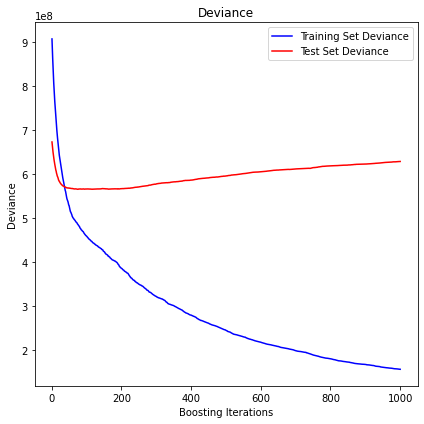

In [61]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

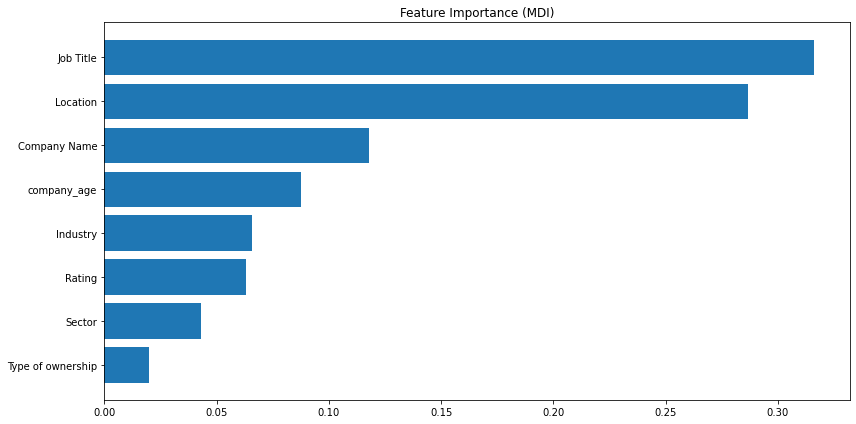

In [62]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()

### classification

In [64]:
merge_data

Job Title  \
0     Data Analyst, Center on Immigration and Justic...   
1                                  Quality Data Analyst   
2                                          Data Analyst   
3                                Reporting Data Analyst   
4                                  Data Science Analyst   
...                                                 ...   
4759                            Principal Data Engineer   
4760                       Cyber Security Data Engineer   
4761                                  AWS Data Engineer   
4762                              Data Analyst â Junior   
4763                   Security Analytics Data Engineer   

                                        Job Description  Rating  \
0     Are you eager to roll up your sleeves and harn...     3.2   
1     Overview\n\nProvides analytical and technical ...     3.8   
2     Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
3     ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   
4     Data Science Analyst\n\nJob Details\nLevel\nEx...     3.7   
...                                                 ...     ...   
4759  ComResource is looking for a Principal Data En...     4.6   
4760  ApTask is a leading staffing and recruitment c...     3.9   
4761  About Us\n\nTachyon Technologies is a Digital ...     4.4   
4762  Job description\nInterpret data, analyze resul...     5.0   
4763  Job DescriptionThe Security Analytics Data Eng...     3.8   

                            Company Name  Location   Headquarters  Founded  \
0              Vera Institute of Justice  New York   New York, NY     1961   
1     Visiting Nurse Service of New York  New York   New York, NY     1893   
2                               Celerity  New York     McLean, VA     2002   
3                                FanDuel  New York   New York, NY     2009   
4                GNY Insurance Companies  New York   New York, NY     1914   
...                                  ...       ...            ...      ...   
4759                         ComResource  Columbus   Columbus, OH     1991   
4760                              ApTask    Dublin     Iselin, NJ     2010   
4761                Tachyon Technologies    Dublin     Irving, TX     2011   
4762    Staffigo Technical Services, LLC  Columbus  Woodridge, IL     2008   
4763                      PDS Tech, Inc.    Dublin     Irving, TX     1977   

                   Type of ownership                          Industry  \
0             Nonprofit Organization                 Social Assistance   
1             Nonprofit Organization  Health Care Services & Hospitals   
2     Subsidiary or Business Segment                       IT Services   
3                  Company - Private               Sports & Recreation   
4                  Company - Private                Insurance Carriers   
...                              ...                               ...   
4759               Company - Private                       IT Services   
4760               Company - Private                       IT Services   
4761               Company - Private                       IT Services   
4762               Company - Private                       IT Services   
4763               Company - Private            Staffing & Outsourcing   

                                Sector  ... Easy Apply low_salary  \
0                           Non-Profit  ...       True      37000   
1                          Health Care  ...         -1      37000   
2               Information Technology  ...         -1      37000   
3     Arts, Entertainment & Recreation  ...       True      37000   
4                            Insurance  ...       True      37000   
...                                ...  ...        ...        ...   
4759            Information Technology  ...         -1      55000   
4760            Information Technology  ...         -1      55000   
4761            Information Technology  ...         -1      55000   
4762            

In [98]:
x_df = merge_data[['Location','Company Name','company_age','low_salary','high_salary']]

y_df = np.where(merge_data['job_category']=='da', 1, 0)

In [99]:
np.count_nonzero(y_df == 1)

1206

In [100]:
from sklearn.preprocessing import LabelEncoder

x_df = x_df.apply(LabelEncoder().fit_transform)

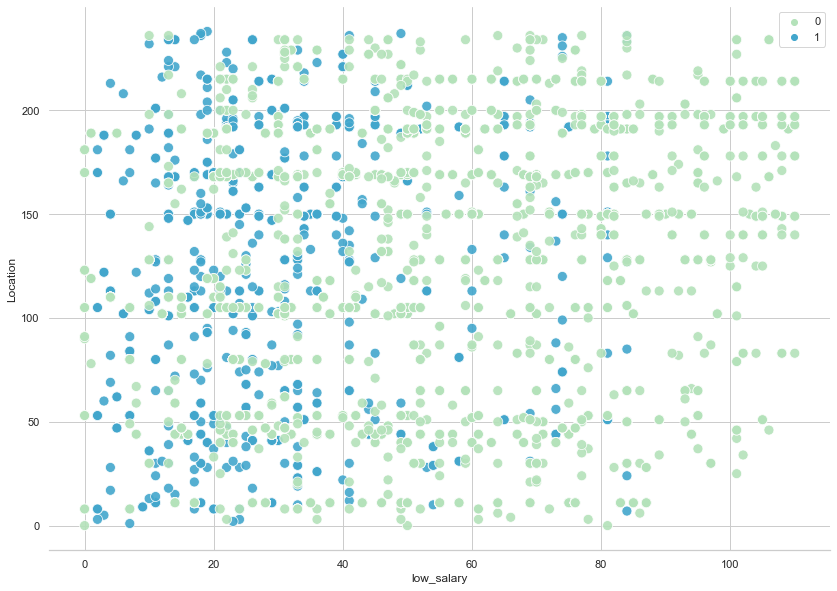

In [102]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='low_salary', y='Location', data=x_df, hue=y_df, palette='GnBu', s=100, alpha=0.9)
sns.despine(left=True)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=1)

In [104]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

def print_evaluate(classifier, y_test, prediction):  
    scores_accuracy = cross_val_score(classifier, x_df, y_df, cv=10, scoring='accuracy')
    scores_f1 = cross_val_score(classifier, x_df, y_df, cv=10, scoring='f1_macro')
    print('K-fold cross-validation results:')
    print(classifier.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(classifier.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())
    print('Classification report: ')
    print(classification_report(y_test, prediction))


### Logistic regression

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[649,  57],
       [170,  77]])

In [107]:
print_evaluate(logreg, y_test, prediction)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.755
LogisticRegression average f1 is 0.617
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       706
           1       0.57      0.31      0.40       247

    accuracy                           0.76       953
   macro avg       0.68      0.62      0.63       953
weighted avg       0.74      0.76      0.74       953



In [108]:
from sklearn.metrics import roc_curve, auc
def plot_auc(y_test, prediction):
    [fpr, tpr, thr] = roc_curve(y_test, prediction)
    idx = np.min(np.where(tpr > 0.8))
    plt.figure()
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

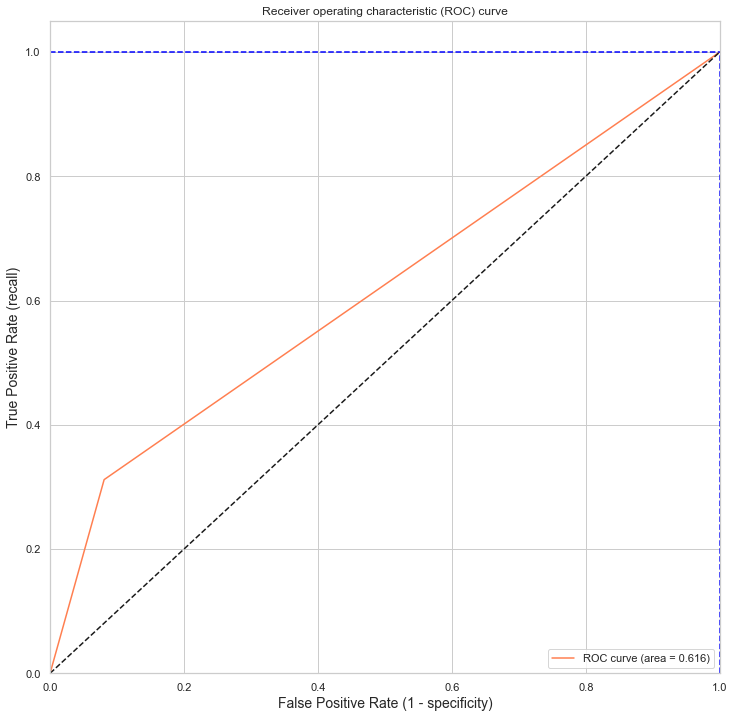

In [109]:
plot_auc(y_test, prediction)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)

In [112]:
print_evaluate(logreg, y_test, prediction)

K-fold cross-validation results:
LogisticRegression average accuracy is 0.755
LogisticRegression average f1 is 0.617
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       706
           1       0.57      0.31      0.40       247

    accuracy                           0.76       953
   macro avg       0.68      0.62      0.63       953
weighted avg       0.74      0.76      0.74       953



### Decision tree 

In [113]:
y_df = merge_data['job_category']

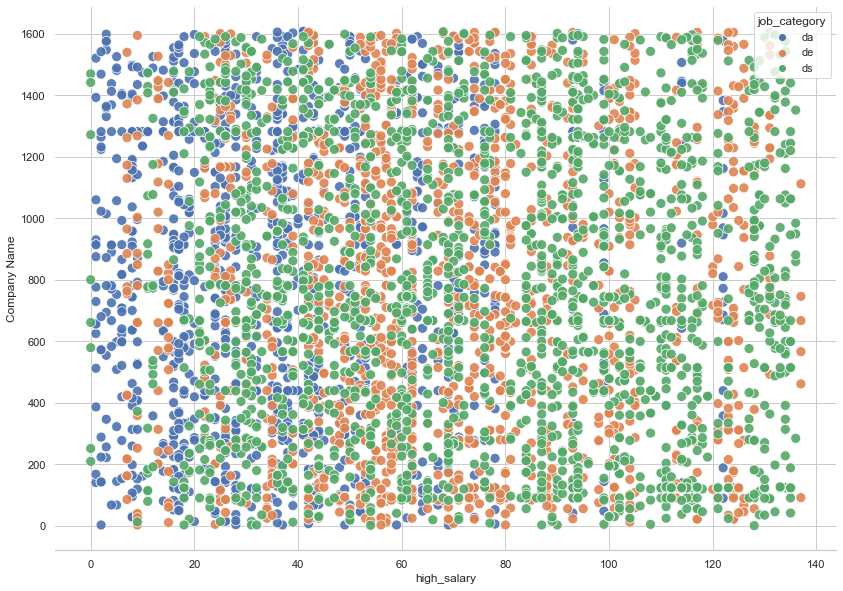

In [115]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='high_salary', y='Company Name', data=x_df, hue=y_df, palette='deep', s=100, alpha=0.9)
sns.despine(left=True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=15)

In [117]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

prediction = dtc.predict(X_test)

In [118]:
print_evaluate(dtc, y_test, prediction)

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.481
DecisionTreeClassifier average f1 is 0.454
Classification report: 
              precision    recall  f1-score   support

          da       0.95      0.92      0.94       227
          de       0.97      0.99      0.98       269
          ds       0.96      0.97      0.96       457

    accuracy                           0.96       953
   macro avg       0.96      0.96      0.96       953
weighted avg       0.96      0.96      0.96       953



In [119]:
importance = dtc.feature_importances_
importance

array([0.20378916, 0.01969006, 0.02470285, 0.30152492, 0.450293  ])

<AxesSubplot:>

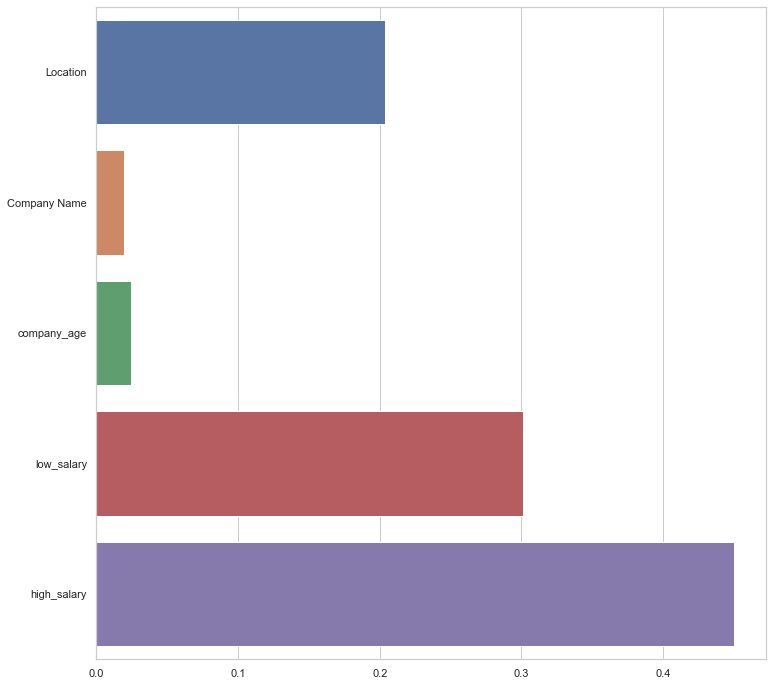

In [120]:
sns.barplot(x=importance, y=x_df.columns)